In [1]:
import fnmatch, re, os
import json

def parametrizedFileSelection(fileDirectory, fileArguments):
    files = []
    
    for k,v in fileArgs.items():
        if type(v) is not list:
            fileArgs[k] = [v]
        
    for file in os.listdir(fileDirectory):
        for key in fileArguments:
            match = False
            for value in fileArguments[key]:
                expression = key + "=" + str(value)
                if expression + ',' in file or expression + '_' in file:
                    match = True
            if match == False:
                break
    
        if match == True:
            files.append(file)
        
    return files


# Experiment factors
Communs
- filename
- nWorkers
------- order based ------------
- voterSeed
- nVoters
--------Community detection based----------
- comDet
- assignment
- withBoundary (false si order based)
--------- Other ----------
- distType (close/far)
- minDist 

Pour un même nombre de worker on fait varier la seed (cas order based)

(array([246.,  26.,   8.,   4.,   6.,   5.,   5.,   1.,   1.,   2.,   3.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,
          0.,   2.,   3.,   1.,   4.,   2.,   4.,   2.,   2.,   4.,   6.,
          1.,   0.,   4.,   0.,   2.,   4.,   2.,   3.,   1.,   0.,   0.,
          1.,   1.,   1.,   4.,   1.,   0.,   4.,   2.,   1.,   2.,   2.,
          0.,   2.,   0.,   0.,  10.,   0.,   3.,   0.,   1.,   2.,   1.,
          6.,   2.,   5.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   2.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 29

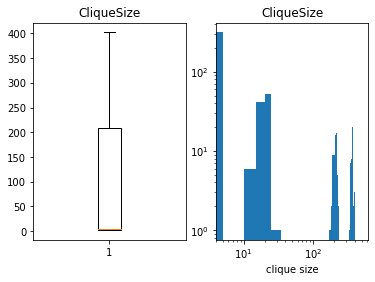

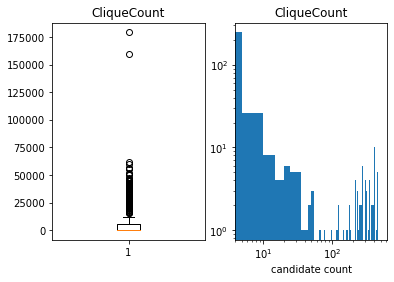

In [27]:
import matplotlib.pyplot as plt

largestCliqueSize = lambda x : len(x[0])
largestCliqueCount = lambda x : len(x)


largestCliqueSizeData = df["candidates"].apply(largestCliqueSize)
largestCliqueCountData = df["candidates"].apply(largestCliqueCount)


fig1, ax1 = plt.subplots(ncols=2)
ax1[0].set_title('CliqueSize')
ax1[0].boxplot(largestCliqueSizeData)
ax1[1].set_title('CliqueSize')
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[1].set_xlabel('clique size')


ax1[1].hist(largestCliqueSizeData, bins=np.arange(0,500,5))

fig2, ax2 = plt.subplots(ncols=2)
ax2[0].set_title('CliqueCount')
ax2[0].boxplot(largestCliqueCountData)
ax2[1].set_title('CliqueCount')
ax2[1].set_xlabel('candidate count')
ax2[1].set_xscale('log')
ax2[1].set_yscale('log')


ax2[1].hist(largestCliqueCountData, bins=np.arange(0,500,5))

In [2]:
import pandas as pd

orderBasedDirectory = "../outputs/"

# fileArgs = { "nWorkers": 10, "voterSeed": 0, "minDist": "1"}
fileArgs = { "nWorkers": 807 }      
files = parametrizedFileSelection(orderBasedDirectory, fileArgs)

filesData = []

for file in files:
    with open(orderBasedDirectory + file) as json_file:
        data = json.load(json_file)
        filesData.append(data)        
       # print(len(data['candidates'][0]) ,"-", len(data['candidates']), data['candidates'])
df = pd.DataFrame(filesData)

df.head()

,filefullname,filename,filepath,imgDirPath,comDet,imgDiamPath,imgRadPath,imgNpCPath,diameter,diameters,...,imgCDPath,imgInCDPath,imgWpCPath,workerComDistances,workerDistances,workersPerCommunity,distType,minDist,cliqueImgPath,candidates
0,facebook_combined.csv,facebook_combined,graphs/formatted/facebook_combined.csv,graphs/img/facebook_combined/,community_multilevel,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,8,"[5, 5, 2, 2, 4, 5, 8, 3, 3, 3, 2, 2, 3, 5, 2, 2]",...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,"{'0': {'self': [0, 78, 0, 0, 0, 0, 0, 0, 0, 0]...","{'self': [0, 807, 0, 0, 0, 0, 0, 0, 0, 0], 'sa...",16,close,1,graphs/img/facebook_combined/facebook_combined...,"[[V2142, V2266, V2611, V2220, V1962, V2233, V1..."
1,facebook_combined.csv,facebook_combined,graphs/formatted/facebook_combined.csv,graphs/img/facebook_combined/,community_multilevel,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,8,"[5, 5, 2, 2, 4, 5, 8, 3, 3, 3, 2, 2, 3, 5, 2, 2]",...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,"{'0': {'self': [0, 78, 0, 0, 0, 0, 0, 0, 0, 0]...","{'self': [0, 807, 0, 0, 0, 0, 0, 0, 0, 0], 'sa...",16,close,2,graphs/img/facebook_combined/facebook_combined...,"[[V1405, V1561, V1460, V1585, V1266, V1286, V1..."
2,facebook_combined.csv,facebook_combined,graphs/formatted/facebook_combined.csv,graphs/img/facebook_combined/,community_multilevel,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,8,"[5, 5, 2, 2, 4, 5, 8, 3, 3, 3, 2, 2, 3, 5, 2, 2]",...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,"{'0': {'self': [0, 78, 0, 0, 0, 0, 0, 0, 0, 0]...","{'self': [0, 807, 0, 0, 0, 0, 0, 0, 0, 0], 'sa...",16,close,3,graphs/img/facebook_combined/facebook_combined...,"[[V414, V566, V1719, V1825, V1494, V1307, V180..."
3,facebook_combined.csv,facebook_combined,graphs/formatted/facebook_combined.csv,graphs/img/facebook_combined/,community_multilevel,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,8,"[5, 5, 2, 2, 4, 5, 8, 3, 3, 3, 2, 2, 3, 5, 2, 2]",...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,"{'0': {'self': [0, 78, 0, 0, 0, 0, 0, 0, 0, 0]...","{'self': [0, 807, 0, 0, 0, 0, 0, 0, 0, 0], 'sa...",16,far,6,graphs/img/facebook_combined/facebook_combined...,"[[V894, V4030, V92], [V894, V4030, V89], [V894..."
4,facebook_combined.csv,facebook_combined,graphs/formatted/facebook_combined.csv,graphs/img/facebook_combined/,community_multilevel,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,8,"[5, 5, 2, 2, 4, 5, 8, 3, 3, 3, 2, 2, 3, 5, 2, 2]",...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,graphs/img/facebook_combined/facebook_combined...,"{'0': {'self': [0, 78, 0, 0, 0, 0, 0, 0, 0, 0]...","{'self': [0, 807, 0, 0, 0, 0, 0, 0, 0, 0], 'sa...",16,far,7,graphs/img/facebook_combined/facebook_combined...,"[[V850, V1, V4030], [V850, V1, V4024], [V850, ..."


## Distribution du nombre de workers distants en fonction de la seed utilisée

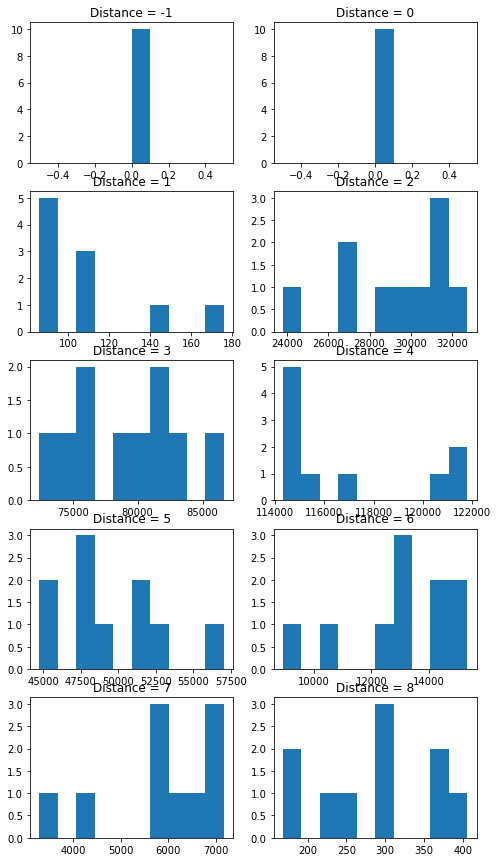

In [4]:
from scipy import stats
import numpy as np

otherWorkersDistance = lambda x : x["other"]

data = []

for seed in range(0,10):
    filterOnSeed = df.where(df["voterSeed"] == seed).dropna()
    otherWorkersDistanceData = filterOnSeed.head(1)["workerDistances"].apply(otherWorkersDistance)
    data.append(otherWorkersDistanceData.tolist()[0])

newData = np.zeros((10,10), dtype=int)
for x,l in enumerate(data):
    for y in range(0,len(l)):
        newData[x][y] = l[y]


df2 = pd.DataFrame(newData, columns=range(-1,9))

df2 = df2.apply(lambda x : x//2) #remove bidirectionnal links

fig1, ax1 = plt.subplots(nrows=5, ncols=2, figsize=(4*2,3*5))
for index, column in enumerate(df2.columns):
    ax1[index//2][index%2].set_title('Distance = ' + str(column))
    ax1[index//2][index%2].hist(df2[column])

# shapiro_test = stats.shapiro(x)

# print(shapiro_test)
# print(shapiro_test.statistic)
# print(shapiro_test.pvalue)

Commentaire : pas de loi normale (pour l'instant) -> a tester avec les 100 seeds

## Evolution du nombre de workers dans les cliques maximales en fonction de la distance maximale entre workers

In [5]:
def formatToDict(df):
    candidatesByMinDist = {}
    for idx, row in df.iterrows():
        candidatesByMinDist[row["minDist"]] = row["candidates"]
    return candidatesByMinDist

In [6]:
df.head()
df = df[[
    'filename',
    'nWorkers',
    'voterSeed',
    'comDet',
    'assignment',
    'withBoundary',
    'distType',
    'candidates',
    'minDist'
]]
cols = df.columns[:-2].tolist()
groupDf = df.groupby(by=cols)[['candidates', 'minDist']].apply(formatToDict)

cliqueNumber = [ { k:len(v) for k,v in element.items() } for element in groupDf ]
cliqueSize = [ { k:len(v[0]) for k,v in element.items() } for element in groupDf ]


nbRows=len(groupDf)
nbCol=3


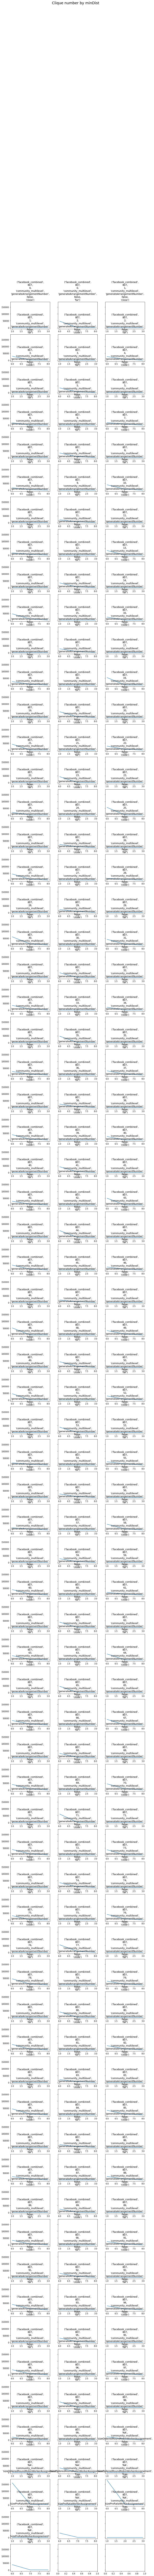

In [7]:
fig,ax = plt.subplots(nrows = (nbRows+nbCol-1)//nbCol, ncols = min(nbCol,nbRows), sharey=True,figsize=(nbCol*4,3*nbRows//nbCol))
fig.suptitle("Clique number by minDist", fontsize=18)

for index, row in enumerate(groupDf):
    ax[index//nbCol][index%nbCol].plot(cliqueNumber[index].keys(), cliqueNumber[index].values())
    ax[index//nbCol][index%nbCol].set_title(',\n'.join(str(groupDf.keys()[index]).split(', ')))

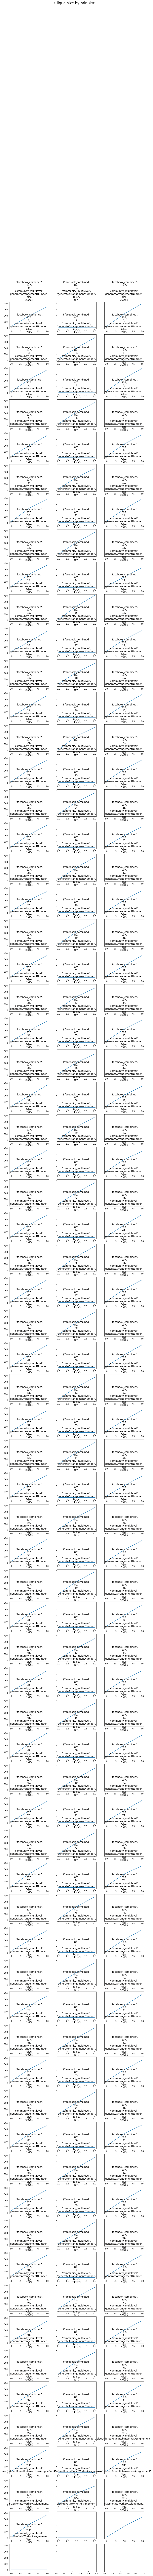

In [8]:
fig,ax = plt.subplots(nrows = (nbRows+nbCol-1)//nbCol, ncols = min(nbCol,nbRows), sharey=True,figsize=(nbCol*4,3*nbRows//nbCol))
fig.suptitle("Clique size by minDist", fontsize=18)

for index, row in enumerate(groupDf):
    ax[index//nbCol][index%nbCol].plot(cliqueSize[index].keys(), cliqueSize[index].values())
    ax[index//nbCol][index%nbCol].set_title(',\n'.join(str(groupDf.keys()[index]).split(', ')))

## Determination d'un k tq à 95% il n'y ait pas de worker colusion

[21, 19, 24, 19, 21, 23, 21, 17, 22, 17, 21, 18, 18, 21, 14, 20, 21, 21, 12, 18, 12, 16, 21, 21, 16, 24, 13, 22, 18, 15, 19, 23, 23, 20, 21, 24, 19, 24, 16, 18, 19, 23, 17, 14, 17, 20, 17, 14, 20, 17, 17, 20, 22, 17, 18, 23, 20, 18, 17, 21, 16, 21, 17, 20, 21, 22, 19, 15, 18, 17, 18, 18, 17, 21, 21, 24, 17, 23, 20, 18, 23, 21, 22, 23, 20, 24, 21, 31, 18, 23, 23, 20, 27, 24, 20, 22, 17, 21, 17, 18, 18, 18, 4, 4]


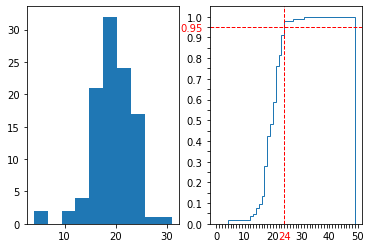

In [66]:
minDist = 1

cliqueSizeByMinDist = [ element.get(minDist) for element in cliqueSize if element.get(minDist) is not None]

print(cliqueSizeByMinDist)

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figSize)
ax1[0].hist(cliqueSizeByMinDist)

bar_heights, _, _ = ax1[1].hist(cliqueSizeByMinDist, cumulative=True, density=True, bins=np.arange(0,50, step=1), histtype="step")
ax1[1].set_yticks(np.arange(0, 1.05, step=0.05))
ax1[1].set_yticklabels([ str((tick*5)/100) if tick*5 %10 == 0 or tick*5 == 95 else "" for tick in range(0,21) ]) # real shit code


xThreshold = 0
for index, v in enumerate(bar_heights):
    if v >= 0.95:
        xThreshold = index
        break
        
ax1[1].set_xticks(np.arange(0, 51, step=1))
ax1[1].set_xticklabels([ str(tick) if tick == xThreshold or tick%10 == 0 else "" for tick in range(0,51) ]) # real shit code
ax1[1].get_yticklabels()[-2].set_color('red')   
ax1[1].get_xticklabels()[xThreshold].set_color('red')
ax1[1].axhline(0.95, color='r', linestyle='dashed', linewidth=1)
ax1[1].axvline(xThreshold, color='r', linestyle='dashed', linewidth=1)


Pour que 95% des executions n'aient pas de collusion il faut un nombre de workers t (sur n workers) min de xThreshold pour une minDist donnée 